## Capstone Project - Recommender Systems

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from string import punctuation
from sklearn import svm
#!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from itertools import chain
from wordcloud import WordCloud
from fractions import Fraction
import re

In [2]:
df = pd.read_csv("Dataset/NLP_Product_Reviews_Dataset.csv")
df['upc'].tail(2)

71042                                          8.78982E+11
71043    602,547,970,220,602,000,000,000,000,000,000,00...
Name: upc, dtype: object

In [3]:
df.head(3)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,2018-02-04T07:28:12Z,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,NaN,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-23T02:53:06Z,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-06T04:49:31Z,2017-08-23T10:37:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391


In [4]:
df['reviews.text'][0]

"i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors are just crazy."

In [5]:
print("Shape of Dataset:\n",df.shape)
print("Columns of Dataset:\n",df.columns)

Shape of Dataset:
 (71044, 25)
Columns of Dataset:
 Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='object')


In [6]:
print("Count of Null Values in each Dataset Columns:\n",df.isnull().sum())

Count of Null Values in each Dataset Columns:
 id                          0
brand                       0
categories                  0
dateAdded                   0
dateUpdated                 0
ean                     31979
keys                        0
manufacturer              141
manufacturerNumber        203
name                        0
reviews.date               67
reviews.dateAdded           0
reviews.dateSeen            0
reviews.didPurchase     38886
reviews.doRecommend     10615
reviews.id              38886
reviews.numHelpful      38536
reviews.rating              0
reviews.sourceURLs          0
reviews.text               36
reviews.title             476
reviews.userCity        65634
reviews.userProvince    70595
reviews.username           96
upc                         2
dtype: int64


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    71044 non-null  object 
 1   brand                 71044 non-null  object 
 2   categories            71044 non-null  object 
 3   dateAdded             71044 non-null  object 
 4   dateUpdated           71044 non-null  object 
 5   ean                   39065 non-null  object 
 6   keys                  71044 non-null  object 
 7   manufacturer          70903 non-null  object 
 8   manufacturerNumber    70841 non-null  object 
 9   name                  71044 non-null  object 
 10  reviews.date          70977 non-null  object 
 11  reviews.dateAdded     71044 non-null  object 
 12  reviews.dateSeen      71044 non-null  object 
 13  reviews.didPurchase   32158 non-null  object 
 14  reviews.doRecommend   60429 non-null  object 
 15  reviews.id         

In [8]:
## create a mapping to fill null values in title column based on ratings provided by user
ratings_list = [5,4,3]
title_Nullmap = df['reviews.rating'].apply(lambda x: 'Good' if x in ratings_list else 'Bad')

In [9]:
df['reviews.title'] = df['reviews.title'].fillna(title_Nullmap)
df['reviews.text'] = df['reviews.text'].fillna(df['reviews.title'])
df['upc'] = df['upc'].fillna(df['reviews.username'])

In [10]:
df[df['upc'].isnull()]

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc


In [11]:
#!pip install pandas-profiling
import pandas_profiling

In [12]:
#pandas_profiling.ProfileReport(df)

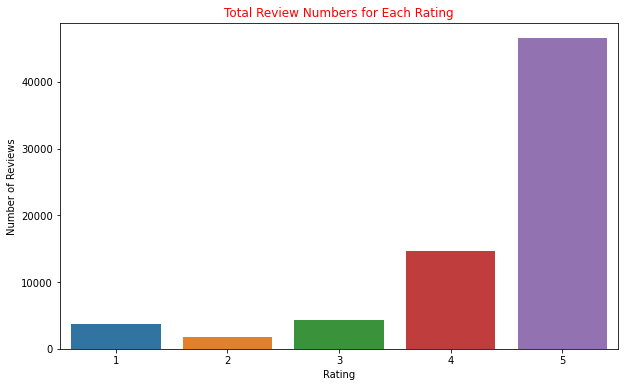

5    46543
4    14598
3     4369
1     3701
2     1833
Name: reviews.rating, dtype: int64

In [13]:
# Total numbers of ratings in the home and kitchen product reviews
plt.figure(figsize = (10,6))
sns.countplot(df['reviews.rating'])
plt.title('Total Review Numbers for Each Rating', color='r')
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['reviews.rating'].value_counts()

<AxesSubplot:ylabel='reviews.rating'>

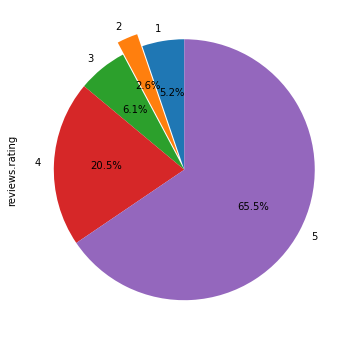

In [14]:
%matplotlib inline
plt.figure(figsize = (10,6))
df.groupby('reviews.rating')['reviews.rating'].count()
df.groupby('reviews.rating')['reviews.rating'].count().plot(kind='pie',autopct='%1.1f%%',startangle=90,explode=(0,0.1,0,0,0),)

In [15]:
#data=review_df.copy()
word_count=[]
for s1 in df['reviews.text']:
    word_count.append(len(str(s1).split()))

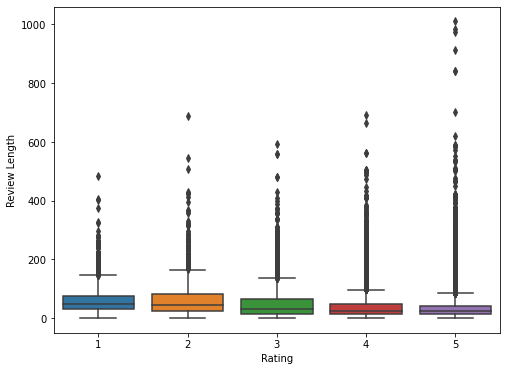

In [16]:
plt.figure(figsize = (8,6))

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x="reviews.rating",y=word_count,data=df)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

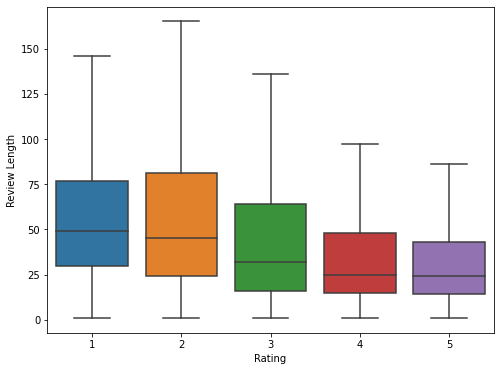

In [17]:
#Since there are outliers in the above boxplot we are not able to clearly visualize.So remove the outliers 
plt.figure(figsize = (8,6))

sns.boxplot(x="reviews.rating",y=word_count,data=df,showfliers=False)
plt.xlabel('Rating')
plt.ylabel('Review Length')

plt.show()

### Most of the customers who bought were having good rating on the product .
### High rating products are less in review length compared to small rating

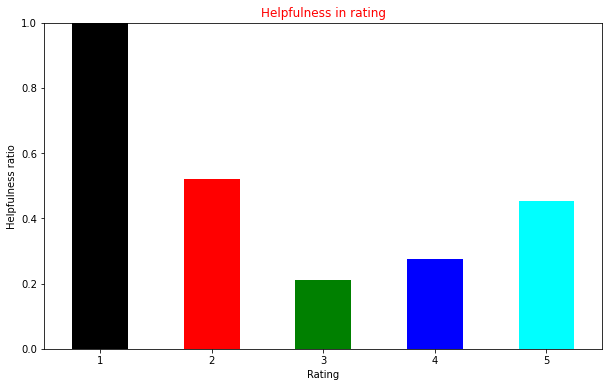

In [18]:
##########################################
## DISTRIBUTION OF RATING FOR HELPFULNESS
########################################## 
plt.figure(figsize = (10,6))
df.groupby('reviews.rating')['reviews.numHelpful'].mean().plot(kind='bar', color=['black', 'red', 'green', 'blue', 'cyan']) 
plt.title("Helpfulness in rating",color='r')
plt.xlabel("Rating")
plt.ylabel("Helpfulness ratio")
plt.ylim([0, 1])
plt.xticks(rotation=0)
plt.show()


### Review Year Feature

In [19]:
# Create a year column and drop time column
# Create a "year" column and drop time column
df['reviews.dateAdded'] = pd.to_datetime(df['reviews.dateAdded'])
df['year'] = df['reviews.dateAdded'].dt.year
#df = df.drop('reviews.dateAdded', axis = 1)
df.head(3)

,id,brand,categories,dateAdded,dateUpdated,ean,keys,manufacturer,manufacturerNumber,name,reviews.date,reviews.dateAdded,reviews.dateSeen,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,upc,year
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",2017-07-25T00:52:42Z,2018-02-05T08:36:58Z,6.02537E+11,"602537205981,universalmusic/14331328,universal...",Universal Music Group / Cash Money,14331328,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,2018-02-04 07:28:12+00:00,"2018-01-15T04:45:00.000Z,2018-01-18T14:30:00.0...",NaN,NaN,NaN,0.0,5,https://redsky.target.com/groot-domain-api/v1/...,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,Joshua,6.02537E+11,2018
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-23 02:53:06+00:00,2017-09-16T09:45:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor. This review was collected as part...,Good,NaN,NaN,Dorothy W,73416000391,2017
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",2017-07-25T05:16:03Z,2018-02-05T11:27:45Z,73416000391,lundbergorganiccinnamontoastricecakes/b000fvzw...,Lundberg,574764,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,2017-09-06 04:49:31+00:00,2017-08-23T10:37:00.000Z,True,NaN,100209113.0,NaN,5,https://www.walmart.com/reviews/product/29775278,Good flavor.,Good,NaN,NaN,Dorothy W,73416000391,2017


In [20]:
df['upc'].value_counts()

44600015996                        8606
25192392665                        5510
8.83929E+11                        3850
7.86937E+11                        3633
24543305002                        3609
                                   ... 
6.71254E+11                           1
846,813,013,260,689,000,000,000       1
28,400,063,999,028,400,000,000        1
8.86971E+11                           1
7.5138E+11                            1
Name: upc, Length: 562, dtype: int64

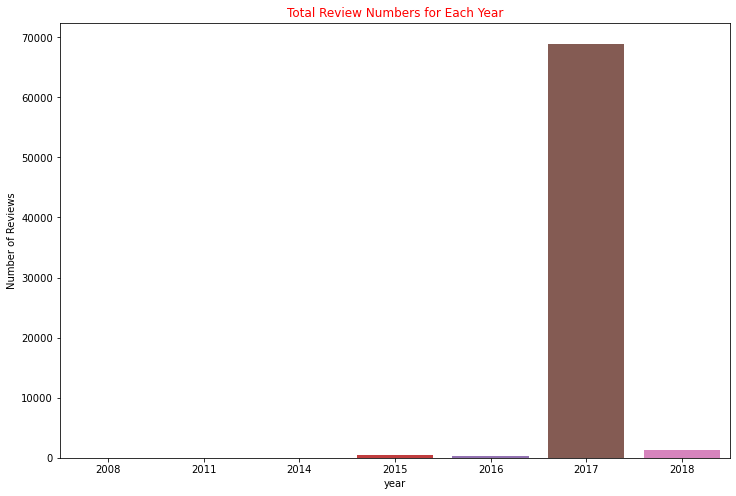

2017    68940
2018     1259
2015      512
2016      315
2014       12
2008        5
2011        1
Name: year, dtype: int64

In [21]:
##################################################################
# Total review for every year in the product
#####################################################################
plt.figure(figsize = (12,8))
sns.countplot(df['year'])
plt.title('Total Review Numbers for Each Year', color='r')
plt.xlabel('year')
plt.ylabel('Number of Reviews')
plt.show()

# Customer totals for each rating class
df['year'].value_counts()

### Reviews ID Feature

In [22]:
# How many unique customers do we have in the dataset?
print('Number of unique customers: {}'.format(len(df['reviews.id'].unique())))

Number of unique customers: 31375


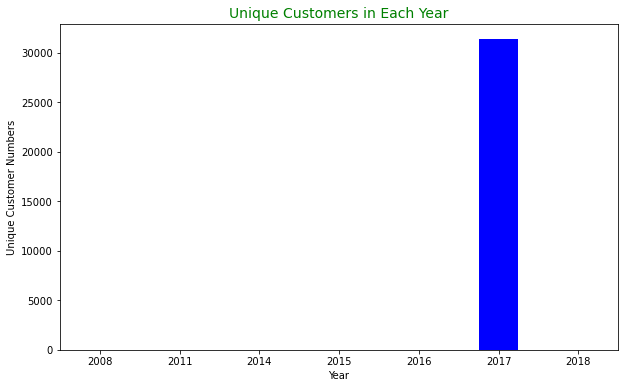

year
2008        5
2011        1
2014        2
2015        0
2016        0
2017    31366
2018        0
Name: reviews.id, dtype: int64


In [23]:
# How many unique customers in each year?
unique_cust = df.groupby('year')['reviews.id'].nunique()

# Plot unique customer numbers in each year
plt.figure(figsize = (10,6))
unique_cust.plot(kind='bar', rot = 0, color = 'b')
plt.title('Unique Customers in Each Year', color='g', size = 14)
plt.xlabel('Year')
plt.ylabel('Unique Customer Numbers')
plt.show()

# Print unique customer numbers in each year
print(unique_cust)

In [24]:
# unique customers for each "rating class"
a = list(df.groupby(['reviews.rating'])['reviews.id'].unique())  
#print(a)
# number of customers
a2 = [len(a[0]),len(a[1]),len(a[2]),len(a[3]),len(a[4])]
#print(a2)
# number of reviews for each "rating class"
b = list(df['reviews.rating'].value_counts())    
#print(b)

uniq_cust_rate = pd.DataFrame({'reviews.rating': ['1', '2', '3', '4', '5'],
                               'number_of_customers': a2,
                               'number_of_reviews': sorted(b)})
print(uniq_cust_rate)

  reviews.rating  number_of_customers  number_of_reviews
0              1                 2357               1833
1              2                  964               3701
2              3                 1588               4369
3              4                 5253              14598
4              5                21218              46543


Text(0, 0.5, 'Number of Reviews')

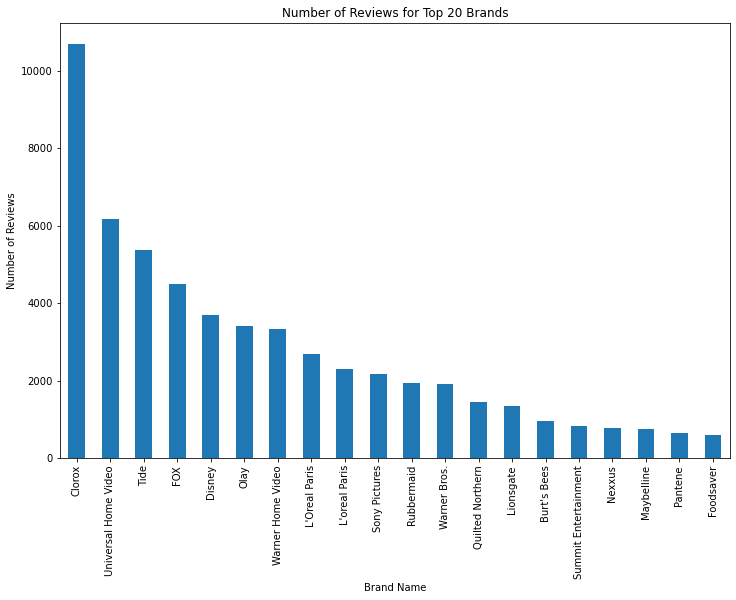

In [25]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 BRANDS  
##########################################

brands = df["brand"].value_counts()
plt.figure(figsize=(12,8))
brands[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

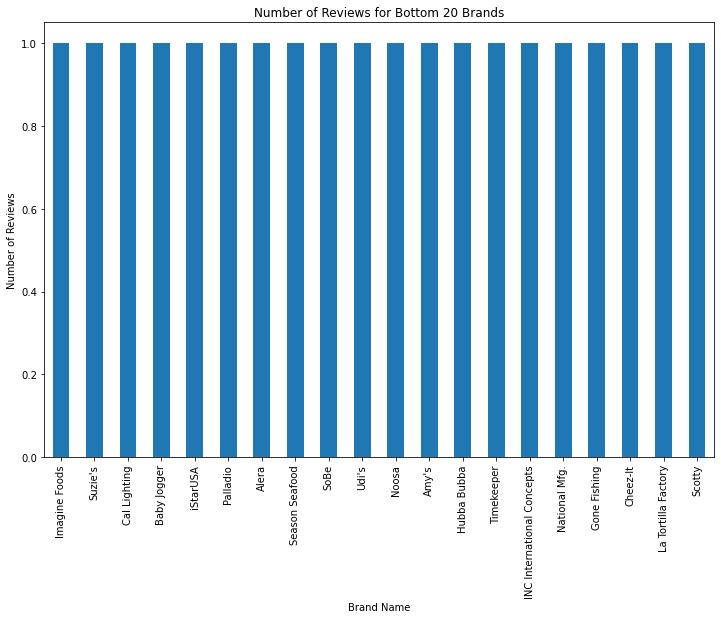

In [26]:
##########################################
## PLOT NUMBER OF REVIEWS FOR BOTTOM 20 BRANDS  
##########################################

brands = df["brand"].value_counts()
# brands.count()
plt.figure(figsize=(12,8))
brands[-20:].plot(kind='bar')
plt.title("Number of Reviews for Bottom 20 Brands")
plt.xlabel('Brand Name')
plt.ylabel('Number of Reviews')

Text(0, 0.5, 'Number of Reviews')

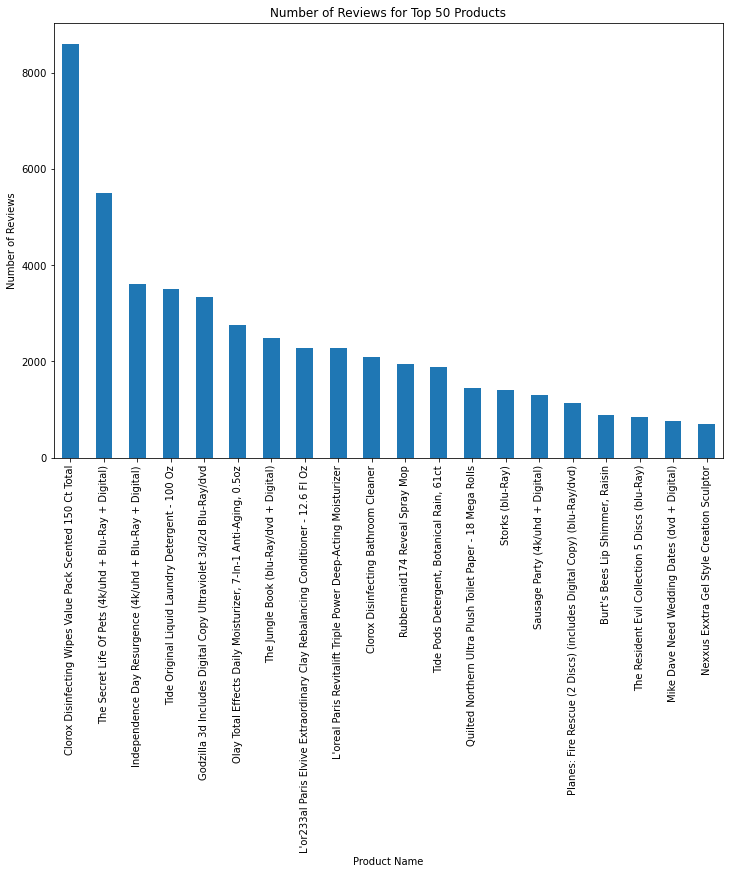

In [27]:
##########################################
## PLOT NUMBER OF REVIEWS FOR TOP 20 PRODUCTS  
##########################################

products = df["name"].value_counts()
plt.figure(figsize=(12,8))
products[:20].plot(kind='bar')
plt.title("Number of Reviews for Top 50 Products")
plt.xlabel('Product Name')
plt.ylabel('Number of Reviews')

In [28]:
## lets copy imporatnt columns into another dataframe
df1 = df[['id','reviews.rating','reviews.text','reviews.title']].copy()
df1['reviews'] = df1['reviews.text'] + df1['reviews.title']
df1.drop(['reviews.text','reviews.title'],inplace=True,axis=1)
df1.head(5)

,id,reviews.rating,reviews
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.Good
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...


### Word Cloud Based on Product Ratings

In [29]:
## lets create a function to create word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
#        max_words=400,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
        
    #plt.title("Review Comments",fontsize=40)
    plt.imshow(wordcloud)
    plt.show()

In [30]:
## lets look few of the review comments from each product rating
print("Product Rating 1:\n",df1[df1['reviews.rating']==1]['reviews'][9])
print("Product Rating 2:\n",df1[df1['reviews.rating']==2]['reviews'][42])
print("Product Rating 3:\n",df1[df1['reviews.rating']==3]['reviews'][18])
print("Product Rating 4:\n",df1[df1['reviews.rating']==4]['reviews'][36])
print("Product Rating 5:\n",df1[df1['reviews.rating']==5]['reviews'][0])

Product Rating 1:
 Got as a surprise for my husband there is nothing special about it just a lube save the money and get plain KY if you just need a lube wish I could return it for a refundDon't buy
Product Rating 2:
 I did receive 1 bottle but when I ordered, it said a pack of 6. I was disappointed about that. This review was collected as part of a promotion.Not the quantity specifed
Product Rating 3:
 I bought this because it had better reviews than the his and hers jelly, but I feel like it didn't work that well for us. It was kind of warm-feeling, but that's about it. I guess I don't know what's supposed to happen! LolPretty nice
Product Rating 4:
 Not sure how this works with clearing your complexion (been using for 2 weeks now) but does keep your skin smooth and clean.Ok so far
Product Rating 5:
 i love this album. it's very good. more to the hip hop side than her current pop sound.. SO HYPE! i listen to this everyday at the gym! i give it 5star rating all the way. her metaphors 

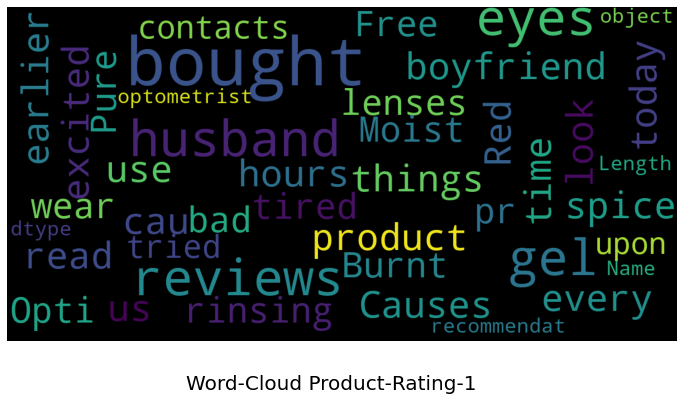

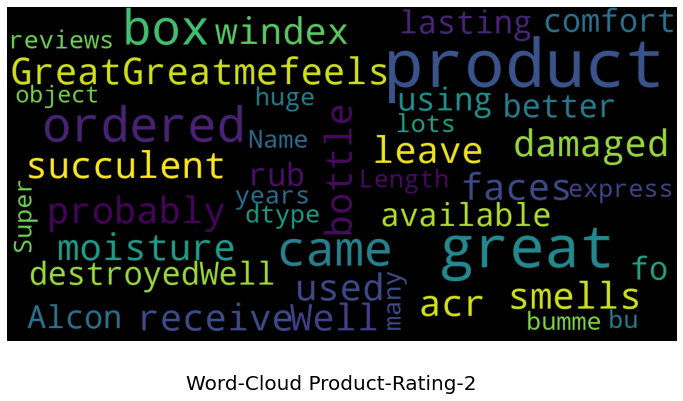

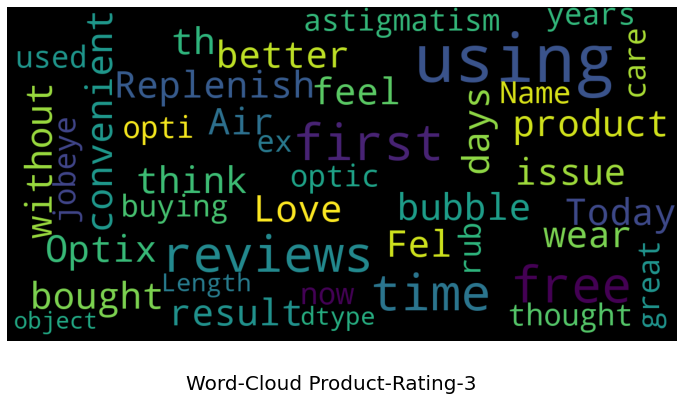

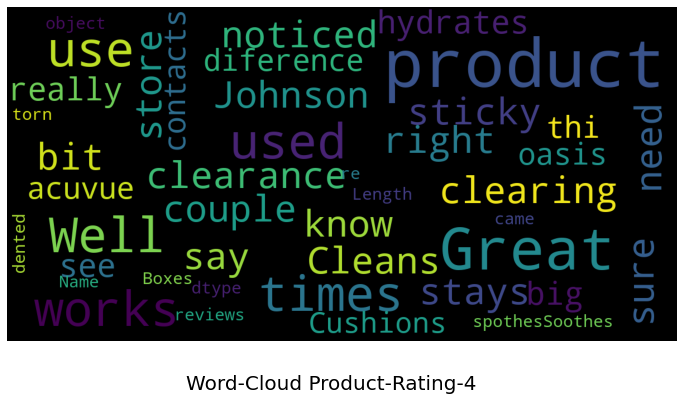

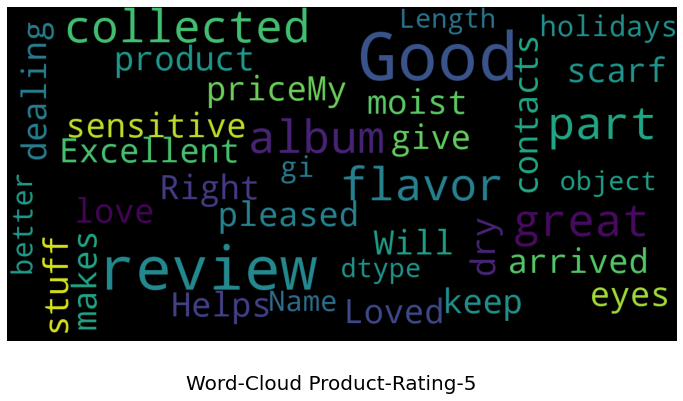

In [31]:
## lets look into word clouds based on product rating
show_wordcloud(df1[df1['reviews.rating']==1]['reviews'],title='Word-Cloud Product-Rating-1')
show_wordcloud(df1[df1['reviews.rating']==2]['reviews'],title='Word-Cloud Product-Rating-2')
show_wordcloud(df1[df1['reviews.rating']==3]['reviews'],title='Word-Cloud Product-Rating-3')
show_wordcloud(df1[df1['reviews.rating']==4]['reviews'],title='Word-Cloud Product-Rating-4')
show_wordcloud(df1[df1['reviews.rating']==5]['reviews'],title='Word-Cloud Product-Rating-5')

In [32]:
df1.isnull().sum()

id                0
reviews.rating    0
reviews           0
dtype: int64

## Sentiment Analysis : TextBlob

We will be performing sentiment analysis using Python Packages.

### Opinion Polarity Identification

### Categorize the reviews column into Positive and Negative sentiments using TextBlob

We explore a simple implementation of the NLP technique known as sentiment analysis, which attempts to quantify 
the tonal properties of a text dataset. This is done using the TextBlob library, and is applied to product reviews column.

We will be relying heavily upon the TextBlob library. This is a highly useful NLP library that provides a number of useful 
functions for text analysis, itself standing upon the shoulders of NLTK and pattern (two more renowned NLP libraries). 
The principal utility of TextBlob is the TextBlob object – we experiment with its ability to classify sentiment below.

In [33]:
# #!pip install textblob

# from textblob import TextBlob

# bloblist_desc = list()

# df_reviews=df1['reviews'].astype(str)
# for row in df_reviews:
#     blob = TextBlob(row)
#     bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
#     df_reviews_polarity = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
 
# def f(df_reviews_polarity):
#     if df_reviews_polarity['sentiment'] > 0:
#         val = "Positive"
#     elif df_reviews_polarity['sentiment'] == 0:
#         val = "Neutral"
#     else:
#         val = "Negative"
#     return val

# df_reviews_polarity['Sentiment_Type'] = df_reviews_polarity.apply(f, axis=1)

# df_reviews_polarity.head(10)

In [34]:
# plt.figure(figsize=(7,7))
# sns.set_style("whitegrid")
# ax = sns.countplot(x="Sentiment_Type", data=df_reviews_polarity)

In [35]:
##########################################
## Classify ratings as good
##########################################

good_rate = len(df1[df1['reviews.rating'] >= 3])
bad_rate = len(df1[df1['reviews.rating']  < 3])

# Printing rates and their total numbers
print ('Good ratings : {} reviews for products'.format(good_rate))
print ('Bad ratings : {} reviews for products'.format(bad_rate))

Good ratings : 65510 reviews for products
Bad ratings : 5534 reviews for products


In [36]:
##########################################
# Apply the new classification to the ratings column
##########################################
df1['rating_class'] = df1['reviews.rating'].apply(lambda x: 'bad' if x < 3 else'good')
df1.head()

,id,reviews.rating,reviews,rating_class
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...,good
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...,good
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.Good,good
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...,bad
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...,bad


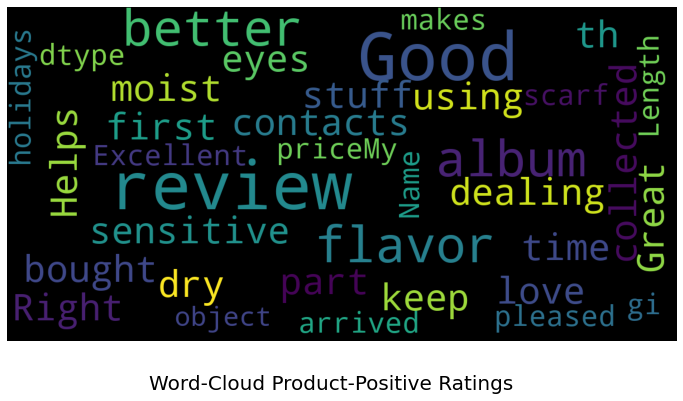

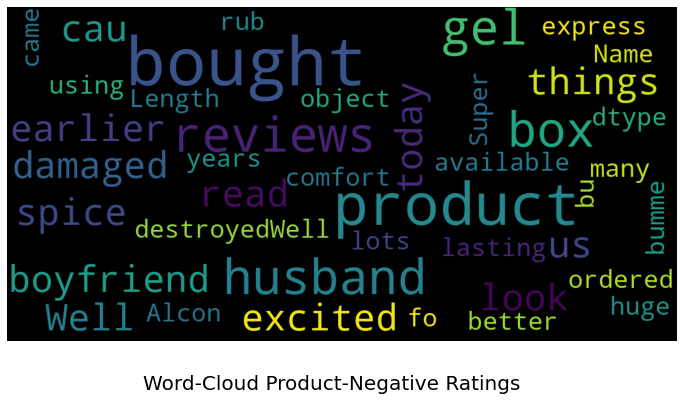

In [37]:
## lets look into word clouds based on product rating
show_wordcloud(df1[df1['rating_class']=='good']['reviews'],title='Word-Cloud Product-Positive Ratings')
show_wordcloud(df1[df1['rating_class']=='bad']['reviews'],title='Word-Cloud Product-Negative Ratings')

### Text Preprocessing
The following text preprocessing are implemented to convert raw reviews to cleaned review, so that it will be easier for us to do feature extraction in the next step.

In [38]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import unicodedata
#import contractions
#from contractions import CONTRACTION_MAP
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize 
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91962\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91962\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\91962\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
# calculate raw tokens in order to measure of cleaned tokens

from nltk.tokenize import word_tokenize
raw_tokens=len([w for t in (df1["reviews"].apply(word_tokenize)) for w in t])
print('Number of raw tokens: {}'.format(raw_tokens))

Number of raw tokens: 3313250


In [40]:
import re, string, unicodedata
import nltk
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem import WordNetLemmatizer

In [41]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    return text

# Define function to expand contractions
def expand_contractions(text):
    contractions_pattern = re.compile('({})'.format('|'.join(CONTRACTION_MAP.keys())),flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = CONTRACTION_MAP.get(match)\
                        if CONTRACTION_MAP.get(match)\
                        else CONTRACTION_MAP.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
    
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text


# special_characters removal
def remove_special_characters(text, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words


def remove_punctuation_and_splchars(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_word = remove_special_characters(new_word, True)
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

stopword_list= stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopword_list:
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation_and_splchars(words)
    words = remove_stopwords(words)
    return words

def lemmatize(words):
    lemmas = lemmatize_verbs(words)
    return lemmas

In [42]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [43]:
def normalize_and_lemmaize(input):
    sample = denoise_text(input)
    sample = expand_contractions(sample)
    sample = remove_special_characters(sample)
    words = nltk.word_tokenize(sample)
    words = normalize(words)
    lemmas = lemmatize(words)
    return ' '.join(lemmas)

In [44]:
df1['clean_text'] = df1['reviews'].map(lambda text: normalize_and_lemmaize(text))

In [45]:
df1

,id,reviews.rating,reviews,rating_class,clean_text
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...,good,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...,good,good flavor review collect part promotiongood
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.Good,good,good flavorgood
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...,bad,read review look buy one couple lubricants ult...
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...,bad,husband buy gel us gel cause irritation felt l...
...,...,...,...,...,...
71039,AVzRGDlw-jtxr-f3yfFH,5,I'm dealing with dry eyes and very sensitive t...,good,deal dry eye sensitive products eye clinic sug...
71040,AVzRGDlw-jtxr-f3yfFH,5,Great stuff! Helps keep my contacts moist all ...,good,great stuff help keep contact moist daygreat s...
71041,AVzRGDlw-jtxr-f3yfFH,5,Right priceMy review,good,right pricemy review
71042,AVzvTLfivKc47QAVfPme,5,I was so pleased when this scarf arrived for m...,good,please scarf arrive multiple reason print colo...


In [46]:
# Let's put aside number of raw tokens in order to measure of cleaned tokens
from nltk.tokenize import word_tokenize
clean_tokens=len([w for t in (df1["clean_text"].apply(word_tokenize)) for w in t])
print('Number of clean tokens: {}\n'.format(clean_tokens))
print('Percentage of removed tokens: {0:.2f}'.format(1-(clean_tokens/raw_tokens)))

Number of clean tokens: 1540256

Percentage of removed tokens: 0.54


In [47]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS

# Datetime
from datetime import datetime

# text preprocessing
#!pip install -U spacy
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
#import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
#nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from catboost import CatBoostClassifier, Pool
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from  sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
#from gensim.models import Word2Vec
from tqdm import tqdm
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

In [48]:
df1['rating_class'] = df1['rating_class'].apply(lambda x: 0 if x == 'bad' else 1)

In [49]:
df1.head()

,id,reviews.rating,reviews,rating_class,clean_text
0,AV13O1A8GV-KLJ3akUyj,5,i love this album. it's very good. more to the...,1,love album good hip hop side current pop sound...
1,AV14LG0R-jtxr-f38QfS,5,Good flavor. This review was collected as part...,1,good flavor review collect part promotiongood
2,AV14LG0R-jtxr-f38QfS,5,Good flavor.Good,1,good flavorgood
3,AV16khLE-jtxr-f38VFn,1,I read through the reviews on here before look...,0,read review look buy one couple lubricants ult...
4,AV16khLE-jtxr-f38VFn,1,My husband bought this gel for us. The gel cau...,0,husband buy gel us gel cause irritation felt l...


In [50]:
# Splitting the Data Set into Train and Test Sets
X = df1['clean_text']
y = df1['rating_class']

In [51]:
# Splitting Dataset into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(53283,)
Test Set Shape		:(17761,)


In [52]:
X_train

54379    leave skin beautiful make face look fresh youn...
29931    great conditioner however not best come make h...
13962    suggest friends use mainly car clean kitchen c...
67330    really funny movie really not mean children ha...
51842             work great hold hair style dayhair spray
                               ...                        
37194    find somewhat difficult provide complete revie...
6265     full action pack funny like actors toolove action
54886    never use olay moisturiser really like stuff d...
860      best glass cleaner available use prodct severa...
15795    great stuff kill germs keep spray bottle bathr...
Name: clean_text, Length: 53283, dtype: object

In [53]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.ocean):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [54]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(9, 6))
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    plt.show()

In [55]:
# Create the word vector with CountVectorizer
count_vect = CountVectorizer(ngram_range=(1,1))
count_vect_train = count_vect.fit_transform(X_train)
#count_vect_train = count_vect_train.toarray()
count_vect_test = count_vect.transform(X_test)
#count_vect_test = count_vect_test.toarray()

In [56]:
# Print vocabulary length
print('Vocabulary length :', len(count_vect.get_feature_names()))

Vocabulary length : 48691


In [57]:
# Assign feature names of vector into a variable
vocab = count_vect.get_feature_names()

In [58]:
from sklearn.metrics import roc_auc_score              ### ROC AUC metrics
from sklearn.metrics import average_precision_score    ### AUC PR metics or average of precision scores calculated for each recall threshold.
    
def modeling(Model, Xtrain = count_vect_train, Xtest = count_vect_test):
    """
    This function apply countVectorizer with machine learning algorithms. 
    """
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign roc-auc score to a variable
    roc_auc = roc_auc_score(y_test, y_pred)
    # Printing evaluation metric (f1-score) 
    print("ROC-AUC score: {}".format(roc_auc))

In [59]:
clf = DummyClassifier(strategy = 'stratified', random_state =42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score = roc_auc_score(y_test, y_pred, average = 'weighted')
    
# Printing evaluation metric (roc-auc-score) 
print("ROC-AUC score: {}".format(score))

ROC-AUC score: 0.5086051903870885


In [60]:
# Compute and print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.09      0.09      0.09      1357
           1       0.92      0.92      0.92     16404

    accuracy                           0.86     17761
   macro avg       0.51      0.51      0.51     17761
weighted avg       0.86      0.86      0.86     17761



## Logistic Regression with CountVectorizer

In [61]:
# Call the modeling function for logistic regression with countvectorizer and print roc-auc score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg',
                                     class_weight = 'balanced', C = 0.1, n_jobs = -1, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_logreg = y_pred

ROC-AUC score: 0.8852480756261795


In [62]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_logreg))

              precision    recall  f1-score   support

           0       0.55      0.83      0.66      1357
           1       0.99      0.94      0.96     16404

    accuracy                           0.93     17761
   macro avg       0.77      0.89      0.81     17761
weighted avg       0.95      0.93      0.94     17761



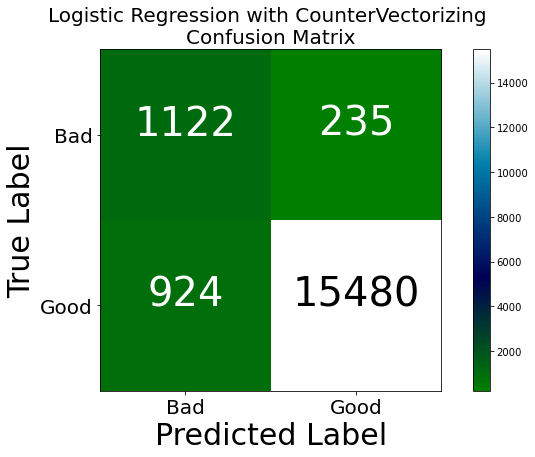

In [63]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred_cv_logreg, "Logistic Regression")

## Random Forest with CountVectorizer

In [64]:
# Call the modeling function for random forest classifier with countvectorizer and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42))

# Assign y_pred to a variable for further process
y_pred_cv_rf = y_pred

ROC-AUC score: 0.6918483494418834


In [65]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_rf))

              precision    recall  f1-score   support

           0       0.97      0.38      0.55      1357
           1       0.95      1.00      0.97     16404

    accuracy                           0.95     17761
   macro avg       0.96      0.69      0.76     17761
weighted avg       0.95      0.95      0.94     17761



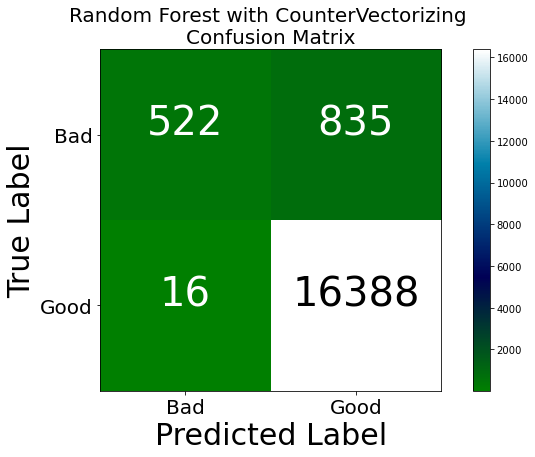

In [66]:
# Print confusion matrix for random forest classifier with countVectorizer
disp_confusion_matrix(y_pred_cv_rf, "Random Forest")

## Naive Bayes with CountVectorizer

In [67]:
# Call the modeling function for naive bayes with countvectorizer and print f1 score
modeling(MultinomialNB())

# Assign y_pred to a variable for further process
y_pred_cv_nb = y_pred

ROC-AUC score: 0.7910780832972601


In [68]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_nb))

              precision    recall  f1-score   support

           0       0.68      0.61      0.64      1357
           1       0.97      0.98      0.97     16404

    accuracy                           0.95     17761
   macro avg       0.82      0.79      0.81     17761
weighted avg       0.95      0.95      0.95     17761



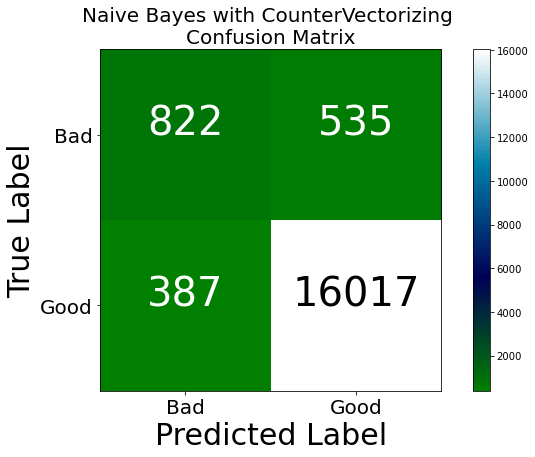

In [69]:
# Print confusion matrix for naive bayes with countVectorizer
disp_confusion_matrix(y_pred_cv_nb, "Naive Bayes")

## XGBoost with CountVectorizer

In [70]:
# Call the modeling function for XGBoost with countvectorizer and print f1 score
modeling(XGBClassifier())

# Assign y_pred to a variable for further process
y_pred_cv_xgb = y_pred

ROC-AUC score: 0.7563557749722959


In [71]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_cv_xgb))

              precision    recall  f1-score   support

           0       0.84      0.52      0.64      1357
           1       0.96      0.99      0.98     16404

    accuracy                           0.96     17761
   macro avg       0.90      0.76      0.81     17761
weighted avg       0.95      0.96      0.95     17761



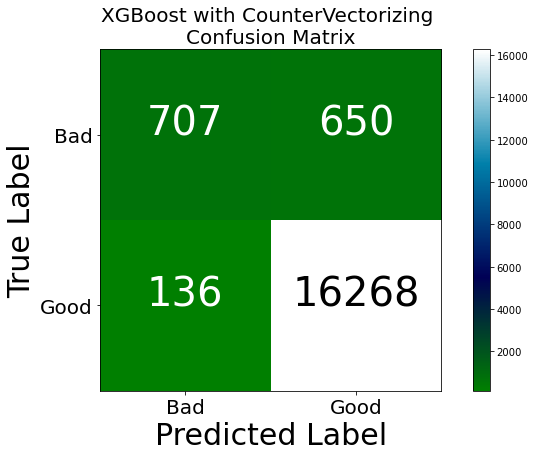

In [72]:
# Print confusion matrix for gradient boosting with countVectorizer
disp_confusion_matrix(y_pred_cv_xgb, "XGBoost")

## CatBoost with CountVectorizer

In [73]:
# # Call the modeling function for CatBoost with countvectorizer and print f1 score
# modeling(CatBoostClassifier(iterations=100, learning_rate=0.8,depth=2, loss_function='Logloss'))

# # Assign y_pred to a variable for further process
# y_pred_cv_catboost = y_pred

## Comparison of Models with CountVectorizer

In [74]:
# Function for converting the "classification report" results to a dataframe
def pandas_classification_report(y_true, y_pred):
    metrics_summary = precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred)

    avg = list(precision_recall_fscore_support(
            y_true=y_true, 
            y_pred=y_pred,
            average='weighted'))

    metrics_sum_index = ['precision', 'recall', 'f1-score', 'support']
    class_report_df = pd.DataFrame(
        list(metrics_summary),
        index=metrics_sum_index)

    support = class_report_df.loc['support']
    total = support.sum() 
    avg[-1] = total

    class_report_df['weighted avg'] = avg

    return class_report_df.T

# Function for adding explanatory columns and organizing all dataframe
def comparison_matrix(y_test, y_pred, label, vector):
    df = pandas_classification_report(y_test, y_pred)
    df['class']=['bad', 'good', 'average']
    #df['accuracy']= metrics.accuracy_score(y_test, y_pred)
    df['auc_roc_score']= metrics.roc_auc_score(y_test, y_pred)
    df['auc_pr_score']= metrics.average_precision_score(y_test, y_pred)     
    df['model'] = label
    df['vectorizer'] = vector
    df = df[['vectorizer', 'model', 'auc_roc_score', 'auc_pr_score', 'class', 'precision', 'recall', 'f1-score', 'support']]
    return df

In [75]:
#For loop for using "comparison functions" 

def comparison_table(y_preds, labels):
    
    # empty list for collecting dataframes
    frames_tv = [] 
    
    # list for y_preds
    y_preds_tv = y_preds
    
    # list for labels
    labels_tv = labels  
    
    vector_tv = 'CountVect'
    
    for y_pred, label in zip(y_preds_tv, labels_tv):
        df = comparison_matrix(y_test, y_pred, label, vector_tv)
        frames_tv.append(df)

    # concatenating all dataframes
    global df_tv
    df_tv = pd.concat(frames_tv)
    
    global df_tv2
    df_tv2 = df_tv.set_index(['vectorizer', 'model', 'auc_roc_score', 'auc_pr_score', 'class'])

In [76]:
def f1_score_bar_plot(df, category, title):
    df = df[df['class']==category]
    x = list(df['model'])
    y = list(df['f1-score'])
    y_round = list(round(df['f1-score'],2))
    a = (list(df['f1-score'])).index(max(list(df['f1-score'])))
    z = (list(df['f1-score'])).index(min(list(df['f1-score'])))
    y_mean = round(df['f1-score'].mean(),2)
    
    plt.rcParams['figure.figsize']=[15,5]
    b_plot = plt.bar(x=x,height=y)
    b_plot[a].set_color('g')
    b_plot[z].set_color('r')
    
    for i,v in enumerate(y_round):
        plt.text(i-.15,0.018,str(v), color='black', fontsize=15, fontweight='bold')
    
    plt.axhline(y_mean,ls='--',color='k',label=y_mean)
    plt.title(title)
    plt.legend()
    
    return plt.show()

## Algorithms Comparison with CountVectorizer

In [77]:
comparison_table(y_preds = [y_pred_cv_logreg, y_pred_cv_rf, y_pred_cv_nb, y_pred_cv_xgb], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost'])

In [78]:
df_tv2

precision  \
vectorizer model         auc_roc_score auc_pr_score class                
CountVect  LogReg        0.885248      0.981585     bad       0.548387   
                                                    good      0.985046   
                                                    average   0.951684   
           Random Forest 0.691848      0.951491     bad       0.970260   
                                                    good      0.951518   
                                                    average   0.952950   
           Naive Bayes   0.791078      0.966638     bad       0.679901   
                                                    good      0.967678   
                                                    average   0.945691   
           XGBoost       0.756356      0.961264     bad       0.838671   
                                                    good      0.961579   
                                                    average   0.952189   

                                                               recall  \
vectorizer model         auc_roc_score auc_pr_score class               
CountVect  LogReg        0.885248      0.981585     bad      0.826824   
                                                    good     0.943672   
                                                    average  0.934745   
           Random Forest 0.691848      0.951491     bad      0.384672   
                                                    good     0.999025   
                                                    average  0.952086   
           Naive Bayes   0.791078      0.966638     bad      0.605748   
                                                    good     0.976408   
                                                    average  0.948089   
           XGBoost       0.756356      0.961264     bad      0.521002   
                                                    good     0.991709   
                                                    average  0.955746   

                                                             f1-score  support  
vectorizer model         auc_roc_score auc_pr_score class                       
CountVect  LogReg        0.885248      0.981585     bad      0.659418   1357.0  
                                                    good     0.963915  16404.0  
                                                    average  0.940651  17761.0  
           Random Forest 0.691848      0.951491     bad      0.550923   1357.0  
                                                    good     0.974693  16404.0  
                                                    average  0.942316  17761.0  
           Naive Bayes   0.791078      0.966638     bad      0.640686   1357.0  
                                                    good     0.972023  16404.0  
                                                    average  0.946708  17761.0  
           XGBoost       0.756356      0.961264     bad      0.642727   1357.0  
                                                    good     0.976412  16404.0  
                                                    average  0.950917  17761.0

## Average f1 Score - Models with CountVectorizer

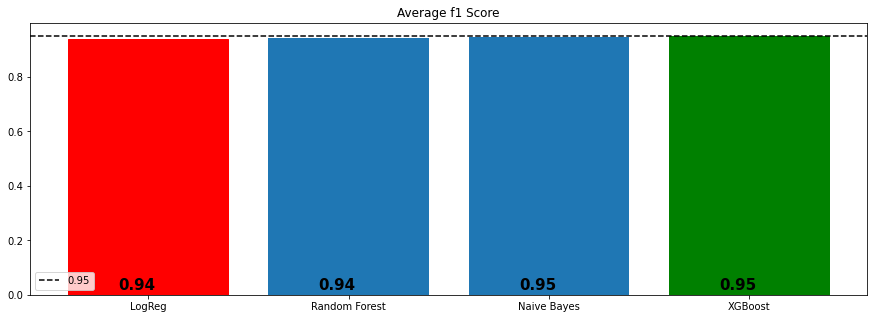

In [79]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average f1 Score")

## TF-IDF

In [80]:
# Create the word vector with TF-IDF Vectorizer
tfidf_vect = TfidfVectorizer(ngram_range=(1, 2))
tfidf_vect_train = tfidf_vect.fit_transform(X_train)
#tfidf_vect_train = tfidf_vect_train.toarray()
tfidf_vect_test = tfidf_vect.transform(X_test)
#tfidf_vect_test = tfidf_vect_test.toarray()

In [81]:
# # from sklearn.svm import LinearSVC
# modeling(LinearSVC(class_weight='balanced',random_state=0,tol=1e-1,C=.2),tfidf_vect_train, tfidf_vect_test)
# # Assign y_pred to a variable for further process
# y_pred_tfidf_lnsvc = y_pred
# # Print confusion matrix for Linear SVC with TF-IDF
# disp_confusion_matrix(y_pred_tfidf_lnsvc, "Linear SVC", "TF-IDF")

## Logistic Regression with TF-IDF

In [82]:
# Call the modeling function for logistic regression with TF-IDF and print f1 score
modeling(LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.2, n_jobs = -1, random_state = 42), 
                            tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_logreg = y_pred

ROC-AUC score: 0.9009315627854305


In [83]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_logreg))

              precision    recall  f1-score   support

           0       0.48      0.88      0.62      1357
           1       0.99      0.92      0.95     16404

    accuracy                           0.92     17761
   macro avg       0.73      0.90      0.79     17761
weighted avg       0.95      0.92      0.93     17761



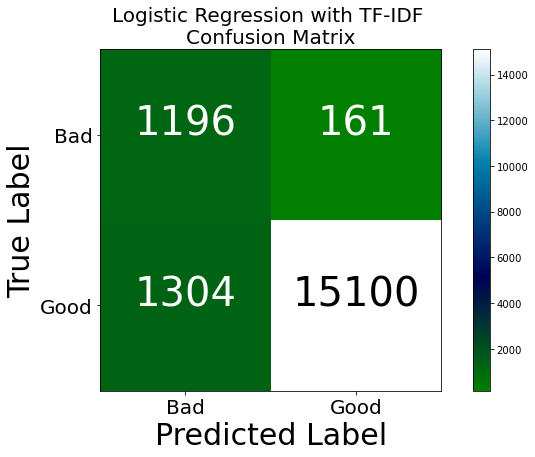

In [84]:
# Print confusion matrix for logistic regression with TF-IDF
disp_confusion_matrix(y_pred_tfidf_logreg, "Logistic Regression", "TF-IDF")

## Random Forest with TF-IDF

In [85]:
# Call the modeling function for random forest classifier with TF-IDF and print f1 score
modeling(RandomForestClassifier(n_estimators = 200, random_state = 42), 
         tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_rf = y_pred

ROC-AUC score: 0.679351195324684


In [86]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_rf))

              precision    recall  f1-score   support

           0       0.97      0.36      0.52      1357
           1       0.95      1.00      0.97     16404

    accuracy                           0.95     17761
   macro avg       0.96      0.68      0.75     17761
weighted avg       0.95      0.95      0.94     17761



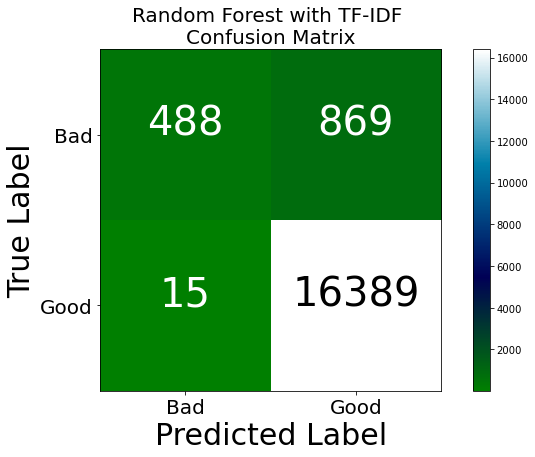

In [87]:
# Print confusion matrix for random forest classifier with TF-IDF
disp_confusion_matrix(y_pred_tfidf_rf, "Random Forest", "TF-IDF")

## Naive Bayes with TF-IDF

In [88]:
# Call the modeling function for naive bayes with TF-IDF and print f1 score
modeling(MultinomialNB(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_nb = y_pred

ROC-AUC score: 0.5099484156226971


In [89]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_nb))

              precision    recall  f1-score   support

           0       1.00      0.02      0.04      1357
           1       0.93      1.00      0.96     16404

    accuracy                           0.93     17761
   macro avg       0.96      0.51      0.50     17761
weighted avg       0.93      0.93      0.89     17761



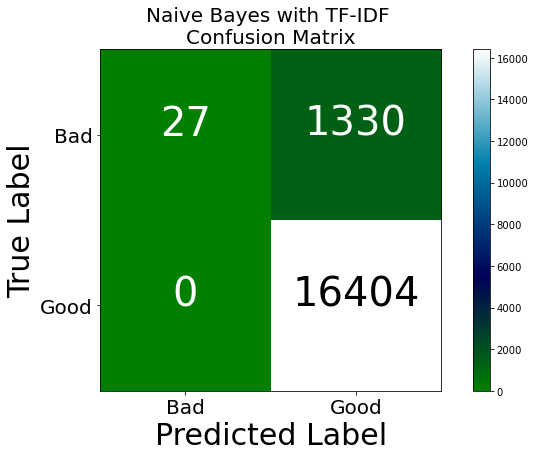

In [90]:
# Print confusion matrix for naive bayes with TF-IDF
disp_confusion_matrix(y_pred_tfidf_nb, "Naive Bayes", "TF-IDF")

## XGBoost with TF-IDF

In [91]:
# Call the modeling function for XGBoost with TF-IDF and print f1 score
modeling(XGBClassifier(), tfidf_vect_train, tfidf_vect_test)

# Assign y_pred to a variable for further process
y_pred_tfidf_xgb = y_pred

ROC-AUC score: 0.7749087745192906


In [92]:
# Compute and print the classification report
print(classification_report(y_test, y_pred_tfidf_xgb))

              precision    recall  f1-score   support

           0       0.82      0.56      0.67      1357
           1       0.96      0.99      0.98     16404

    accuracy                           0.96     17761
   macro avg       0.89      0.77      0.82     17761
weighted avg       0.95      0.96      0.95     17761



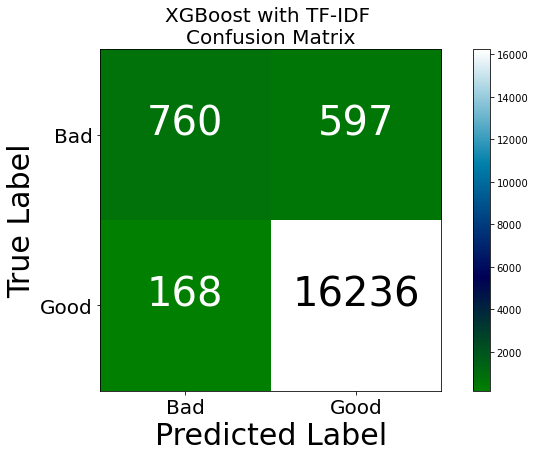

In [93]:
# Print confusion matrix for XGBoost with TF-IDF
disp_confusion_matrix(y_pred_tfidf_xgb, "XGBoost", "TF-IDF")

In [94]:
comparison_table(y_preds = [y_pred_tfidf_logreg, y_pred_tfidf_rf, y_pred_tfidf_nb, y_pred_tfidf_xgb], 
                labels = ['LogReg', 'Random Forest', 'Naive Bayes', 'XGBoost'])

In [95]:
# Print the comparision matrix
print('\nComparision Matrix of Models with TF-IDF Vectorizer\n')
df_tv2


Comparision Matrix of Models with TF-IDF Vectorizer



precision  \
vectorizer model         auc_roc_score auc_pr_score class                
CountVect  LogReg        0.900932      0.984215     bad       0.478400   
                                                    good      0.989450   
                                                    average   0.950404   
           Random Forest 0.679351      0.949623     bad       0.970179   
                                                    good      0.949647   
                                                    average   0.951215   
           Naive Bayes   0.509948      0.925003     bad       1.000000   
                                                    good      0.925003   
                                                    average   0.930733   
           XGBoost       0.774909      0.964115     bad       0.818966   
                                                    good      0.964534   
                                                    average   0.953412   

                                                               recall  \
vectorizer model         auc_roc_score auc_pr_score class               
CountVect  LogReg        0.900932      0.984215     bad      0.881356   
                                                    good     0.920507   
                                                    average  0.917516   
           Random Forest 0.679351      0.949623     bad      0.359617   
                                                    good     0.999086   
                                                    average  0.950228   
           Naive Bayes   0.509948      0.925003     bad      0.019897   
                                                    good     1.000000   
                                                    average  0.925117   
           XGBoost       0.774909      0.964115     bad      0.560059   
                                                    good     0.989759   
                                                    average  0.956928   

                                                             f1-score  support  
vectorizer model         auc_roc_score auc_pr_score class                       
CountVect  LogReg        0.900932      0.984215     bad      0.620171   1357.0  
                                                    good     0.953734  16404.0  
                                                    average  0.928249  17761.0  
           Random Forest 0.679351      0.949623     bad      0.524731   1357.0  
                                                    good     0.973739  16404.0  
                                                    average  0.939433  17761.0  
           Naive Bayes   0.509948      0.925003     bad      0.039017   1357.0  
                                                    good     0.961040  16404.0  
                                                    average  0.890595  17761.0  
           XGBoost       0.774909      0.964115     bad      0.665208   1357.0  
                                                    good     0.976983  16404.0  
                                                    average  0.953163  17761.0

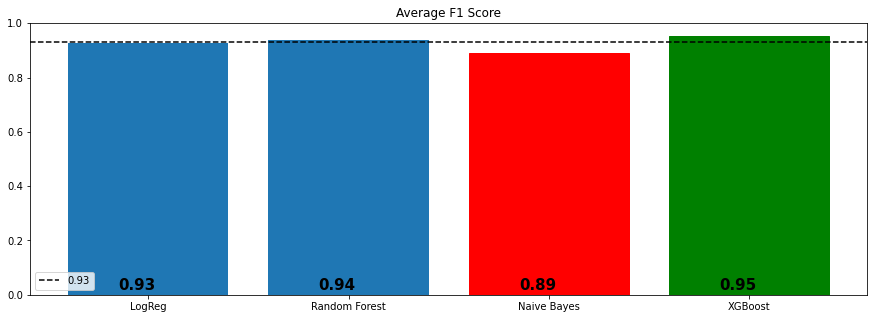

In [96]:
# Plotting f1 score with "f1_score_bar_plot" function
f1_score_bar_plot(df=df_tv, category='average', title= "Average F1 Score")

### Based on above ROC-AUC/PR-AUC  score comparision, we can say that logistics regression has performed better than other models.So lets create pickle file with logistics regression model

## FINAL Logistics Regression Model

In [97]:
logreg_model = LogisticRegression(multi_class = 'multinomial', solver = 'newton-cg', 
                            class_weight = 'balanced', C = 0.2, n_jobs = -1, random_state = 42).fit(tfidf_vect_train, y_train)

#logreg_model.  tfidf_vect_train, tfidf_vect_test

y_pred_log = logreg_model.predict(tfidf_vect_test)
score = roc_auc_score(y_test, y_pred_log, average = 'weighted')
    
# Printing evaluation metric (roc-auc-score) 
print("ROC-AUC score: {}".format(score))

ROC-AUC score: 0.9009315627854305


In [98]:
import pickle
saved_model = pickle.dumps(logreg_model)

In [99]:
modelfrom_pickle = pickle.loads(saved_model)

In [100]:
import joblib
joblib.dump(logreg_model,'nlp_model.pkl')

['nlp_model.pkl']

In [101]:
joblib.dump(tfidf_vect,'transform.pkl')

['transform.pkl']

### Neural Network Implementation

In [102]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.preprocessing.sequence import pad_sequences
from keras.utils import np_utils
#!pip install -U gensim
import gensim
import nltk
from gensim.models.word2vec import Word2Vec
import tensorflow as tf
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
#nltk.download('stopwords')


Using TensorFlow backend.


In [103]:
from keras.preprocessing.text import Tokenizer

samples = X
tokenizer = Tokenizer(lower=True, split=' ') # creates tokenizer
tokenizer.fit_on_texts(samples)  # builds the word index
sequences = tokenizer.texts_to_sequences(samples) #turns strings into list of integers
# word_index is a dictionary mapping words to an integer index
word_index = tokenizer.word_index 
print(f'Found {len(word_index)} unique tokens. ')

Found 58333 unique tokens. 


In [104]:
max([max(sequence) for sequence in sequences])

58333

In [105]:
# Each number is the index of the word in the order of word in original text
print(sequences[0])

[5, 751, 11, 5902, 441, 459, 1382, 509, 244, 1748, 773, 313, 1722, 81, 251, 821, 74, 21997, 21998, 130]


In [106]:
word_index

{'not': 1,
 'use': 2,
 'movie': 3,
 'product': 4,
 'love': 5,
 'great': 6,
 'review': 7,
 'part': 8,
 'collect': 9,
 'like': 10,
 'good': 11,
 'clean': 12,
 'skin': 13,
 'get': 14,
 'one': 15,
 'smell': 16,
 'make': 17,
 'would': 18,
 'hair': 19,
 'buy': 20,
 'really': 21,
 'work': 22,
 'feel': 23,
 'wipe': 24,
 'look': 25,
 'time': 26,
 'go': 27,
 'try': 28,
 'easy': 29,
 'well': 30,
 'kid': 31,
 'no': 32,
 'best': 33,
 'first': 34,
 'much': 35,
 'see': 36,
 'tide': 37,
 'watch': 38,
 'leave': 39,
 'family': 40,
 'pod': 41,
 'think': 42,
 'keep': 43,
 'moisturizer': 44,
 'clorox': 45,
 'even': 46,
 'products': 47,
 'find': 48,
 'dry': 49,
 'new': 50,
 'recommend': 51,
 'also': 52,
 'scent': 53,
 'come': 54,
 'little': 55,
 'day': 56,
 'better': 57,
 'soft': 58,
 'enjoy': 59,
 'conditioner': 60,
 'clothe': 61,
 'always': 62,
 'need': 63,
 'face': 64,
 'back': 65,
 'years': 66,
 'effect': 67,
 'old': 68,
 'mop': 69,
 'nice': 70,
 'purchase': 71,
 'receive': 72,
 'say': 73,
 'way': 74,
 

In [107]:
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in sequences[0]])

In [108]:
def sequence_to_text(sequence):
    words =  [reverse_word_index.get(letter) for letter in sequence]
    return words

my_text = list(map(sequence_to_text, sequences))

In [109]:
print(sequences[0])

[5, 751, 11, 5902, 441, 459, 1382, 509, 244, 1748, 773, 313, 1722, 81, 251, 821, 74, 21997, 21998, 130]


In [110]:
#Word2Vec and Simple Neural Network
word2vec = gensim.models.Word2Vec(my_text,
                                  size=100,
                                  window=10,
                                  min_count=1)
word2vec.train(my_text, total_examples=25026, epochs=10)

(12823296, 15402620)

In [111]:
similar_words = {search_term: [item[0] for item in word2vec.wv.most_similar([search_term], topn=5)]
                  for search_term in ['feel', 'good', 'product', 'cheap', 'junk', 'bad', 'great','price','love']}
similar_words

{'feel': ['felt', 'shiny', 'noticeably', 'smooth', 'eyesreliable'],
 'good': ['great', 'decent', 'goodgreat', 'nice', 'ok'],
 'product': ['products', 'moisturizer', 'cream', 'solution', 'result'],
 'cheap': ['cheaper',
  'cents',
  'usexxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx',
  'useddo',
  'qualityfortunately'],
 'junk': ['strawberriesdoes',
  'defective',
  'filter',
  'poorly',
  'headphonesgreat'],
 'bad': ['terrible', 'horrible', 'ok', 'good', 'sorry'],
 'great': ['good', 'awesome', 'fantastic', 'wonderful', 'amaze'],
 'price': ['value', 'pricevery', 'cost', 'pricedexcellent', 'drugstore'],
 'love': ['like', 'amaze', 'great', 'wonderful', 'awesome']}

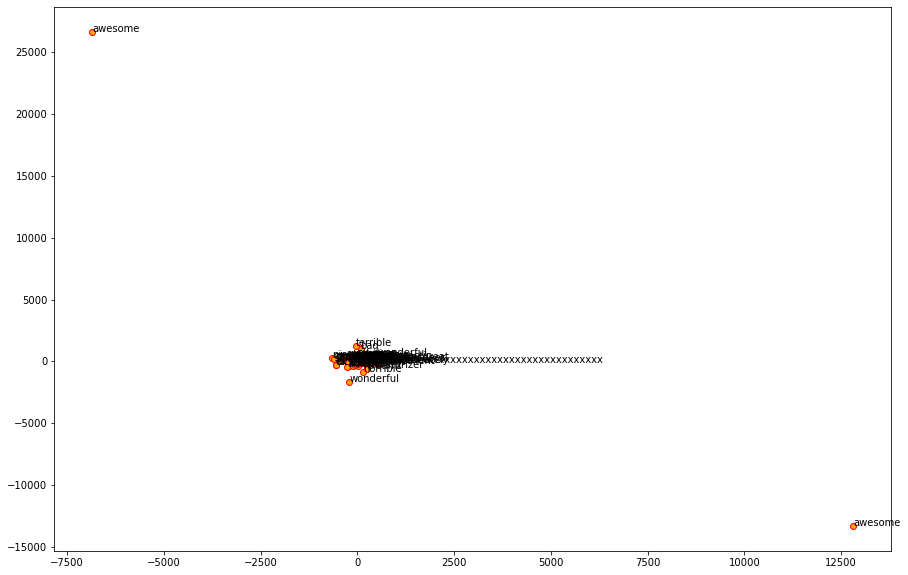

In [112]:
from sklearn.manifold import TSNE

words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = word2vec.wv[words]

tsne = TSNE(n_components=2, random_state=0, n_iter=10000, perplexity=2)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = words

plt.figure(figsize=(15, 10))
plt.scatter(T[:, 0], T[:, 1], c='orange', edgecolors='r')
for label, x, yt in zip(labels, T[:, 0], T[:, 1]):
    plt.annotate(label, xy=(x+1, yt+1), xytext=(0, 0), textcoords='offset points')

In [113]:
len(word_index.keys())

58333

In [114]:
len(word2vec.wv.vocab)

58333

In [115]:
#So we created word vectors using Word2Vec and the model has 58525 unique words where each word has a vector length of 100
#Now we are going to use these dense vectors - word embeddings - in a simple neural network to predict

In [116]:
from keras.preprocessing.sequence import pad_sequences
max_length = 200 # fix the length of each review 
max_words = len(word_index.keys()) # fix number of words 

training_samples = 6000
validation_samples = 2933
data = pad_sequences(sequences, maxlen=max_length)

#labels = np.asarray(y)
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', y.shape)

# Split the data into a training set and a validation set
# But first, shuffle the data, since we started from data
# where sample are ordered (all negative first, then all positive).
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = y[indices]

x_train = data[:training_samples]
y_train = y[:training_samples]
x_val = data[training_samples: training_samples + validation_samples]
y_val = y[training_samples: training_samples + validation_samples]
print('Shape of training data: ', x_train.shape)
print('Shape of validation data: ', x_val.shape)

Shape of data tensor: (71044, 200)
Shape of label tensor: (71044,)
Shape of training data:  (6000, 200)
Shape of validation data:  (2933, 200)


In [117]:
embedding_dim = 100

embedding_matrix = np.zeros((max_words+1, embedding_dim))
for word , i in word_index.items():
    embedding_vector = word2vec.wv[word]
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [118]:
embedding_matrix.shape

(58334, 100)

In [119]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense


model = Sequential()
model.add(Embedding(max_words+1, embedding_dim, input_length=max_length))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          5833400   
_________________________________________________________________
flatten_1 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                640032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 6,473,465
Trainable params: 6,473,465
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 6000 samples, validate on 2933 samples
Epoch 1/10
6000/6000 [==============================] - 6s 918us/step - loss: 0.2740 - acc: 0.9387 - val_loss: 0.1301 - val_acc: 0.9826
Epoch 2/10
6000/6000 [==============================] - 5s 825us/step - loss: 0.1815 - acc: 0.9430 - val_loss: 0.1410 - val_acc: 0.9826
Epoch 3/10
6000/6000 [==============================] - 5s 827us/step - loss: 0.1384 - acc: 0.9458 - val_loss: 0.1325 - val_acc: 0.9823
Epoch 4/10
6000/6000 [==============================] - 5s 842us/step - loss: 0.1071 - acc: 0.9520 - val_loss: 0.1438 - val_acc: 0.9799
Epoch 5/10
6000/6000 [==============================] - 5s 848us/step - loss: 0.0766 - acc: 0.9692 - val_loss: 0.1788 - val_acc: 0.9669
Epoch 6/10
6000/6000 [==============================] - 5s 821us/step - loss: 0.0558 - acc: 0.9838 - val_loss: 0.2165 - val_acc: 0.9587
Epoch 7/10
6000/6000 [==============================] - 5s 839us/step - loss: 0.0413 - a

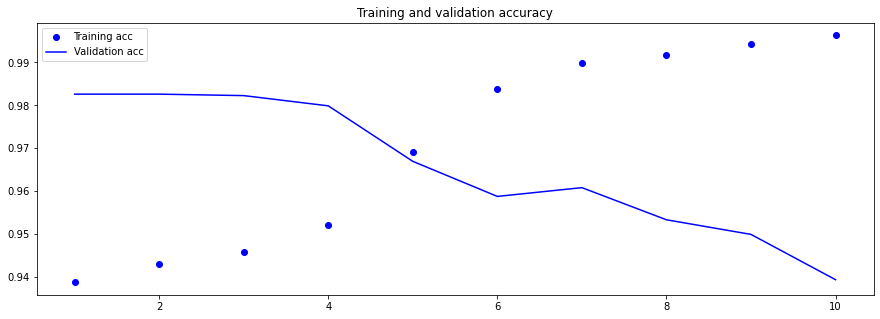

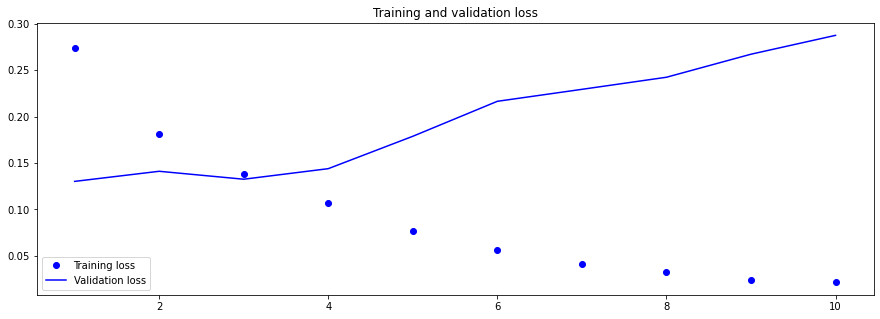

In [121]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### end

## I have used Logistics Regression Model to predict Review Sentiments

## Product Recommender System

In [122]:
df2 = df[['id','name','reviews.rating','keys','upc']].copy()

In [123]:
#pd.set_option('display.max_colwidth', -1)
#df2['upc'] = df2['upc'].astype('int64')
df2.columns = ['UserId','ProductName','Ratings','keys','ProductCode']
df2.tail()

,UserId,ProductName,Ratings,keys,ProductCode
71039,AVzRGDlw-jtxr-f3yfFH,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,optifreepuremoistdisinfectingsolution10floz/b0...,"300650361040,631113253665,300650193108,3006503..."
71040,AVzRGDlw-jtxr-f3yfFH,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,optifreepuremoistdisinfectingsolution10floz/b0...,"300650361040,631113253665,300650193108,3006503..."
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,optifreepuremoistdisinfectingsolution10floz/b0...,"300650361040,631113253665,300650193108,3006503..."
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,5,"878982005883,bebeaulait/50032623,0878982005883...",8.78982E+11
71043,AVzvWCVKglJLPUi8Gzji,Justin Bieber - Under The Mistletoe (vinyl),5,"602547970220,602547695871,602547695864,6025476...","602,547,970,220,602,000,000,000,000,000,000,00..."


In [124]:
df2['ProductCode'] = df2['ProductCode'].str.replace(',', '')
df2['ProductCode'] = df2['ProductCode'].str[:12]

df2.tail(3)

,UserId,ProductName,Ratings,keys,ProductCode
71041,AVzRGDlw-jtxr-f3yfFH,Opti-Free Puremoist Disinfecting Solution 10fl Oz,5,optifreepuremoistdisinfectingsolution10floz/b0...,300650361040
71042,AVzvTLfivKc47QAVfPme,Bebe Au Lait174 Premium Muslin Nursing Scarf -...,5,"878982005883,bebeaulait/50032623,0878982005883...",8.78982E+11
71043,AVzvWCVKglJLPUi8Gzji,Justin Bieber - Under The Mistletoe (vinyl),5,"602547970220,602547695871,602547695864,6025476...",602547970220


In [125]:
check = df2['keys'].str[0:12].str.isdigit()
#print(check)

df2['ProductCode'] = np.where(df2['keys'].str[0:12].str.isdigit(), df2['keys'].str[:12],df2['ProductCode'])

df2.head(50)

,UserId,ProductName,Ratings,keys,ProductCode
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,"602537205981,universalmusic/14331328,universal...",602537205981
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,lundbergorganiccinnamontoastricecakes/b000fvzw...,73416000391
2,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes,5,lundbergorganiccinnamontoastricecakes/b000fvzw...,73416000391
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",67981934427
4,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",67981934427
5,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",67981934427
6,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",67981934427
7,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",67981934427
8,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",67981934427
9,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel,1,"kylovesensualitypleasuregel/b00u2whx8s,0679819...",67981934427


In [126]:
df2['ProductCode'].value_counts()

44600015996     8606
025192392665    5510
8.83929E+11     3689
024543305002    3609
037000138822    3498
                ... 
886976158828       1
080596040017       1
070303023600       1
745146923256       1
897640002965       1
Name: ProductCode, Length: 588, dtype: int64

In [127]:
df2.shape,df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71044 entries, 0 to 71043
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   UserId       71044 non-null  object
 1   ProductName  71044 non-null  object
 2   Ratings      71044 non-null  int64 
 3   keys         71044 non-null  object
 4   ProductCode  71044 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.7+ MB


((71044, 5), None)

In [128]:
df2.isnull().sum()

UserId         0
ProductName    0
Ratings        0
keys           0
ProductCode    0
dtype: int64

In [129]:
len(df2['UserId'].unique())

600

In [130]:
len(df2['ProductName'].unique())

600

In [131]:
counts1=df2['UserId'].value_counts() 
counts2=df2['ProductName'].value_counts()

In [132]:
counts1

AVpf3VOfilAPnD_xjpun    8606
AVpgOPJHLJeJML43KwSj    5510
AVpjDSAZLJeJML43rgNP    3609
AVph3agoilAPnD_x-Mv3    3498
AVpfPaoqLJeJML435Xk9    3330
                        ... 
AVpiRWMlilAPnD_xCiRE       1
AVphfFktilAPnD_x5-xl       1
AVpfh1gsilAPnD_xdX_S       1
AVpfDflP1cnluZ0-c5RJ       1
AVpiLKKA1cnluZ0-Kpkm       1
Name: UserId, Length: 600, dtype: int64

In [133]:
counts2

Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                                             8606
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                                                  5510
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                                              3609
Tide Original Liquid Laundry Detergent - 100 Oz                                                       3498
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                                       3330
                                                                                                      ... 
Healthy Skoop Organic Protein Powder - Chocolate - 15.9oz                                                1
American Crew Classic Grooming Spray                                                                     1
Amy's174 Bowls Mushroom Risotto Gluten Free - 9.5oz                                                      1
Avery174 11-1/4 X 9-1/4 Index Maker E

In [134]:
len(counts1[counts1>=40].index)

123

In [188]:
len(counts2[counts2>=0].index)

600

In [136]:
df3=df2[df2['UserId'].isin(counts1[counts1 >=0].index)]
df3.shape

(71044, 5)

In [137]:
df3=df3[df3['ProductName'].isin(counts2[counts2 >=0].index)]
df3.shape

(71044, 5)

In [184]:
# found = df3[df3['UserId']=="AVpf3VOfilAPnD_xjpun"]
# print(found['UserId'].count())
# if len(found) == 1:
#     print(found)

In [138]:
df3.head()
# saving dataframe to csv for later use in main file
df3.to_csv('df3.csv')

In [139]:
Ratings_sum = pd.DataFrame(df3.groupby(['ProductName'])['Ratings'].sum()).rename(columns = {'Ratings': 'Ratings_sum'})
top10 = Ratings_sum.sort_values('Ratings_sum', ascending = False).head(10)
top10

,Ratings_sum
ProductName,
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,41493
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital),25813
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital),14621
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,14484
Tide Original Liquid Laundry Detergent - 100 Oz,13758
The Jungle Book (blu-Ray/dvd + Digital),11797
"Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz",11278
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,10286
L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer,10187


In [140]:
top10_popular=top10.merge(df3,left_index = True, right_on = 'ProductName').drop_duplicates(
    ['ProductCode', 'ProductName'])[['ProductCode', 'ProductName','Ratings_sum']]

In [141]:
print ('Top 10 Popular Products by sum user ratings\n')
top10_popular

Top 10 Popular Products by sum user ratings



,ProductCode,ProductName,Ratings_sum
6588,44600015996,Clorox Disinfecting Wipes Value Pack Scented 1...,41493
39086,025192392665,The Secret Life Of Pets (4k/uhd + Blu-Ray + Di...,25813
62725,024543305002,Independence Day Resurgence (4k/uhd + Blu-Ray ...,14621
23195,8.83929E+11,Godzilla 3d Includes Digital Copy Ultraviolet ...,14484
47667,037000138822,Tide Original Liquid Laundry Detergent - 100 Oz,13758
32637,786936850628,The Jungle Book (blu-Ray/dvd + Digital),11797
52333,781549235602,"Olay Total Effects Daily Moisturizer, 7-In-1 A...",11278
29148,071249334966,L'or233al Paris Elvive Extraordinary Clay Reba...,10286
57712,71249227916,L'oreal Paris Revitalift Triple Power Deep-Act...,10187
18791,044600080338,Clorox Disinfecting Bathroom Cleaner,10134


In [142]:
df3 = df3.drop_duplicates(subset=['ProductName'])
ratingsd=df3.pivot(index='ProductName',columns= 'UserId',values='Ratings').fillna(0)
ratingsd.head()

UserId,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YnUMYglJLPUi8IJpK,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1Yo6FPglJLPUi8IK3u,AV1YpiJvvKc47QAVguxy,AV1YqAaMGV-KLJ3adiDj,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZSp2uglJLPUi8IQFy,AV1ZT7GLglJLPUi8IQLI,AV1ZVIgy-jtxr-f31W9N,AV1d76w7vKc47QAVhCqn,AV1h6Gu0glJLPUi8IjA_,AV1h6gSl-jtxr-f31p40,AV1l8zRZvKc47QAVhnAv,AV2AvGnjGV-KLJ3alTQH,AV2Avn5dGV-KLJ3alTjq,AV2BOOWS-jtxr-f39GPS,AVpe-M4-ilAPnD_xSF1K,AVpe-MCY1cnluZ0-bCv_,AVpe-PJnLJeJML43ziaj,AVpe-YAL1cnluZ0-bHGh,AVpe-ltS1cnluZ0-bL8w,AVpe31o71cnluZ0-YrSD,AVpe38Uy1cnluZ0-YuJR,AVpe3_ikilAPnD_xPykq,AVpe4-GPLJeJML43xmuY,AVpe41TqilAPnD_xQH3d,AVpe4Bq81cnluZ0-YwTN,AVpe4hE0ilAPnD_xQABx,AVpe4hlXLJeJML43xbrB,AVpe4pnBilAPnD_xQDeb,AVpe59io1cnluZ0-ZgDU,AVpe5AMsLJeJML43xnku,AVpe5JOgilAPnD_xQPfE,AVpe5Mv4ilAPnD_xQQyy,AVpe5WElLJeJML43xv4b,AVpe5c23LJeJML43xybi,AVpe5s3RLJeJML43x4eA,AVpe5tC61cnluZ0-ZZ86,AVpe5ttZLJeJML43x4yO,AVpe625_ilAPnD_xQ4SP,AVpe6C3WLJeJML43yApY,AVpe6CHv1cnluZ0-ZhwN,AVpe6FfKilAPnD_xQmHi,AVpe6FpaLJeJML43yBuP,AVpe6PCDLJeJML43yFQH,AVpe6_VI1cnluZ0-Z4do,AVpe6n2_LJeJML43yOgE,AVpe71Vk1cnluZ0-aL_Z,AVpe78stLJeJML43ytOY,AVpe7GIELJeJML43yZfu,AVpe7JTHilAPnD_xQ_Cl,AVpe7jB8LJeJML43yj91,AVpe7sl91cnluZ0-aI1Y,AVpe7tA31cnluZ0-aI-r,AVpe7zdzLJeJML43yp3d,AVpe8dHWLJeJML43y4uG,AVpe8gsILJeJML43y6Ed,AVpe8q4T1cnluZ0-afct,AVpe8xjUilAPnD_xRkxC,AVpe9W4D1cnluZ0-avf0,AVpe9vHs1cnluZ0-a4TU,AVpe_5U_ilAPnD_xSrxG,AVpe_N91LJeJML43z4jD,AVpe_dxlilAPnD_xSiHI,AVpe_pDG1cnluZ0-bjSf,AVpe_y-I1cnluZ0-bmvh,AVpf--o9LJeJML43G_Fq,AVpf-GsfLJeJML43GxG4,AVpf-Wet1cnluZ0-uYLu,AVpf-bS61cnluZ0-uZcq,AVpf-k78LJeJML43G4qN,AVpf-lMV1cnluZ0-ub0_,AVpf0O60ilAPnD_xizE6,AVpf0YhQLJeJML43ETff,AVpf0eb2LJeJML43EVSt,AVpf0kZFilAPnD_xi5QZ,AVpf0pfrilAPnD_xi6s_,AVpf0thK1cnluZ0-r8vR,AVpf1pwXLJeJML43EqpT,AVpf1ryk1cnluZ0-sONd,AVpf2tw1ilAPnD_xjflC,AVpf385g1cnluZ0-s0_t,AVpf3VOfilAPnD_xjpun,AVpf3okQLJeJML43FMif,AVpf4WWN1cnluZ0-s7Wj,AVpf4oLxLJeJML43FcxC,AVpf5CnILJeJML43FjaU,AVpf5FF71cnluZ0-tHAV,AVpf5Z1zLJeJML43FpB-,AVpf5ZcH1cnluZ0-tL9V,AVpf5olc1cnluZ0-tPrO,AVpf5ujMilAPnD_xkQVi,AVpf63aJLJeJML43F__Q,AVpf7HOwilAPnD_xkl3L,AVpf7I3i1cnluZ0-tnL6,AVpf7LysilAPnD_xkm9G,AVpf7aUAilAPnD_xkqbP,AVpf7fFbilAPnD_xkrmW,AVpf8AoBilAPnD_xkzJ2,AVpf99c6LJeJML43Gu3K,AVpf9UGp1cnluZ0-uITX,AVpf9_3MLJeJML43GvdB,AVpf9pzn1cnluZ0-uNTM,AVpfA5BeLJeJML430eOi,AVpfAgSp1cnluZ0-b2-K,AVpfAkX91cnluZ0-b4d8,AVpfBO2vLJeJML430mGh,AVpfBSJgilAPnD_xTLf3,AVpfBU2S1cnluZ0-cJsO,AVpfBeN6LJeJML430rrn,AVpfBpnEilAPnD_xTUBx,AVpfBrUZilAPnD_xTUly,AVpfBuqY1cnluZ0-cTBI,AVpfBwE4ilAPnD_xTWO1,AVpfC3KoLJeJML431KRR,AVpfCi3kilAPnD_xTn3k,AVpfCjEEilAPnD_xTn75,AVpfCuzrilAPnD_xTroT,AVpfCvKt1cnluZ0-cpI2,AVpfCy9b1cnluZ0-cqWS,AVpfD9xTLJeJML431ig2,AVpfDA6wilAPnD_xTxdg,AVpfDI3xilAPnD_xTz-k,AVpfD_NRilAPnD_xUG56,AVpfDbSP1cnluZ0-c3wo,AVpfDflP1cnluZ0-c5RJ,AVpfDiTDLJeJML431Y21,AVpfE5UF1cnluZ0-dY1N,AVpfE7puilAPnD_xUcCW,AVpfELcXLJeJML431naf,AVpfEqFbilAPnD_xUV28,AVpfEqruilAPnD_xUWDr,AVpfErGsLJeJML431yRX,AVpfF7k8ilAPnD_xUyWf,AVpfFGqP1cnluZ0-ddjG,AVpfFTpK1cnluZ0-diMS,AVpfFs_1ilAPnD_xUtRm,AVpfFymYilAPnD_xUvMh,AVpfGRUHilAPnD_xU5nU,AVpfGTRQLJeJML432WYA,AVpfG_ujilAPnD_xVI8L,AVpfGuDrLJeJML432fDz,AVpfH2Rx1cnluZ0-eYtu,AVpfHI2filAPnD_xVL7R,AVpfHZMxLJeJML432tfs,AVpfHf4wLJeJML432vqK,AVpfIGFeLJeJML4328YR,AVpfIN84LJeJML432_D9,AVpfIOoV1cnluZ0-ehGp,AVpfIfnYilAPnD_xVpGi,AVpfIvbgLJeJML433Kph,AVpfJCq51cnluZ0-ey-L,AVpfJP1C1cnluZ0-e3Xy,AVpfJcHuLJeJML433ZrY,AVpfKOYiilAPnD_xWOFw,AVpfKa3uilAPnD_xWSGx,AVpfKb8k1cnluZ0-fQdA,AVpfKhuv1cnluZ0-fSVr,AVpfL-z9ilAPnD_xWzE_,AVpfLnfPLJeJML434HpK,AVpfM_ytilAPnD_xXIJb,AVpfMpZ51cnluZ0-f_L9,AVpfN6Z71cnluZ0-gZmO,AVpfNVsj1cnluZ0-gNQN,AVpfNWbPilAPnD_xXPR7,AVpfNc9cLJeJML434tza,AVpfNfEMLJeJML434uf-,AVpfNglu1cnluZ0-gQ7x,AVpfO5u71cnluZ0-guiN,AVpfOIrkilAPnD_xXgDG,AVpfOfIqLJeJML435D06,AVpfOmKwLJeJML435GM7,AVpfOrD0ilAPnD_xXrRj,AVpfP-rELJeJML435jEN,AVpfPKzxLJeJML435SYL,AVpfPPkEilAPnD_xX3cP,AVpfPaoqLJeJML435Xk9,AVpfPjqKLJeJML435aZR,AVp

In [143]:
ratingsd.shape

(600, 600)

In [144]:
from sklearn.model_selection import train_test_split
traind, testd = train_test_split(ratingsd, test_size=0.30,random_state=42)
train = traind.values
test = testd.values

In [145]:
def item_similarity(ratings, epsilon=1e-9):
    # epsilon -> for handling dived-by-zero errors
    sim = ratings.T.dot(ratings) + epsilon
    norms = np.array([np.sqrt(np.diagonal(sim))])
    return (sim / norms / norms.T)

In [146]:
item_sim = item_similarity(train)

In [147]:
def predict_item(ratings, similarity):
    return ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

In [148]:
item_prediction = predict_item(train, item_sim)

In [149]:
item_prediction[:4, :4]

from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [150]:
print('Item-based CF MSE: ' + str(get_mse(item_prediction, test)))

Item-based CF MSE: 11.388887854360513


In [151]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(traind) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pm=pd.DataFrame(cosine_similarity(r_mat_tr))
#pm.head()
ctrain = cosine_similarity(r_mat_tr)

[0.00607481 0.00607457 0.00606213 0.00600994 0.00606075 0.00599452
 0.00607232 0.00607393 0.00607651 0.00607467 0.00607692 0.00607548
 0.00607239 0.00607699 0.00606016 0.00607075 0.00607571 0.00607711
 0.00607583 0.00605551 0.00605965 0.00607716 0.00607605 0.00606586
 0.00606017 0.00607694 0.00607679 0.00597415 0.00599849 0.00607595
 0.00606027 0.00607659 0.00606962 0.00605832 0.00605008 0.00606671
 0.00601458 0.00606903 0.00605504 0.00601389 0.00604457 0.00602034
 0.00607045 0.00607345 0.00607229 0.00607272 0.0060643  0.00607069
 0.0060549  0.0060452 ]
0.30295521636552764


In [152]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity

svd = TruncatedSVD(n_components=50, n_iter=7, random_state=42)
r_mat_tr=svd.fit_transform(testd) 
print(svd.explained_variance_ratio_)  
print(svd.explained_variance_ratio_.sum())

#pmtt=pd.DataFrame(cosine_similarity(r_mat_tr))
#print (pmtt[:2])
#pmtt.head()
ctest = cosine_similarity(r_mat_tr)

[0.01223783 0.01214061 0.01210779 0.01226248 0.01217046 0.01210669
 0.01226155 0.01204616 0.01225912 0.01218255 0.01211385 0.01222137
 0.01221628 0.01226191 0.01199045 0.01206364 0.01226321 0.01208406
 0.01225525 0.0122474  0.01225826 0.01205765 0.01223068 0.01217367
 0.01219608 0.01221151 0.01220851 0.01219023 0.01226076 0.01224652
 0.01218821 0.01226303 0.01226292 0.01223849 0.01224776 0.0122515
 0.01222542 0.01222602 0.01211217 0.01215273 0.01208548 0.01222203
 0.01224667 0.01216014 0.01217376 0.01223871 0.01222593 0.01205856
 0.01216092 0.01215593]
0.6094229402218848


In [153]:
print(' CF MSE: ' + str(get_mse(ctrain, ctest)))

 CF MSE: 0.06512759864364341


In [154]:
df3 = df3.sort_values(by='Ratings')
df3 = df3.reset_index(drop=True)
count_users = df3.groupby("UserId", as_index=False).count()
df3.head()

,UserId,ProductName,Ratings,keys,ProductCode
0,AVphSrWZilAPnD_x3onE,"Hormel Black Label Bacon, Original",1,"037600351607,037600445955,hormelblacklabelbaco...",037600351607
1,AVpgr86FLJeJML43RdKr,Maybelline Instant Age Rewind Eraser Dark Circ...,1,"041554259247,maybellineinstantagerewinderaserd...",041554259247
2,AVpgQUiyilAPnD_xpzge,Keri Shea Butter Body Lotion,1,"300672100153,kerisheabutterbodylotion/b002t59n...",300672100153
3,AVpfKb8k1cnluZ0-fQdA,Head & Shoulders Classic Clean Conditioner,1,headshouldersclassiccleanconditioner/b0015c9fg...,37000143079
4,AVpi74wrLJeJML43qZEl,"Aveeno Stress Relief Moisturizing Lotion, 12oz",1,"381370039167,aveenostressreliefmoisturizinglot...",381370039167


In [155]:
count = df3.groupby("ProductName", as_index=False).mean()
count

,ProductName,Ratings
0,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,3
1,100:Complete First Season (blu-Ray),2
2,12110209 - Honeywell Quietset 8-Speed Tower Fa...,1
3,16ct Peppa Pig Lunch Napkins,5
4,2017-2018 Brownline174 Duraflex 14-Month Plann...,5
...,...,...
595,Working Girl (dvd),2
596,"Yardley Of London Bath and Shower Gel, Exfolia...",5
597,Yes To Carrots Nourishing Body Wash,1
598,Yes To Grapefruit Rejuvenating Body Wash,1


In [156]:
items_df = count[['ProductName']]
items_df.head(10)
#print(len(items_df))

,ProductName
0,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...
1,100:Complete First Season (blu-Ray)
2,12110209 - Honeywell Quietset 8-Speed Tower Fa...
3,16ct Peppa Pig Lunch Napkins
4,2017-2018 Brownline174 Duraflex 14-Month Plann...
5,"2x Ultra Era With Oxi Booster, 100fl Oz"
6,"2x Ultra Era with Oxi Booster, 50fl oz"
7,2x2 Advantage Glideaway Deluxe 4-Bike Carrier ...
8,"42 Dual Drop Leaf Table with 2 Madrid Chairs"""
9,4C Grated Parmesan Cheese 100% Natural 8oz Shaker


In [157]:
users_df = count_users[['UserId']]
users_df.head()
print(len(users_df))

600


In [158]:
users_list = users_df.values
len(users_list)

600

In [159]:
df_clean_matrix = df3.pivot(index='ProductName', columns='UserId', values='Ratings').fillna(0)
df_clean_matrix = df_clean_matrix.T
R = (df_clean_matrix).values
R

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [160]:
user_ratings_mean = np.mean(R, axis = 1)
R_demeaned = R - user_ratings_mean.reshape(-1, 1)
R_demeaned

array([[-0.00833333, -0.00833333, -0.00833333, ..., -0.00833333,
        -0.00833333, -0.00833333],
       [-0.00833333, -0.00833333, -0.00833333, ..., -0.00833333,
        -0.00833333, -0.00833333],
       [-0.00166667, -0.00166667, -0.00166667, ..., -0.00166667,
        -0.00166667, -0.00166667],
       ...,
       [-0.00166667, -0.00166667, -0.00166667, ..., -0.00166667,
        -0.00166667, -0.00166667],
       [-0.00833333, -0.00833333, -0.00833333, ..., -0.00833333,
        -0.00833333, -0.00833333],
       [-0.00833333, -0.00833333, -0.00833333, ..., -0.00833333,
        -0.00833333, -0.00833333]])

In [161]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(R_demeaned)

sigma = np.diag(sigma)

In [162]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = df_clean_matrix.columns)
preds_df['UserId'] = users_df
preds_df.set_index('UserId', inplace=True)
preds_df.head(5)

ProductName,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),12110209 - Honeywell Quietset 8-Speed Tower Fan Oscillating,16ct Peppa Pig Lunch Napkins,2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era With Oxi Booster, 100fl Oz","2x Ultra Era with Oxi Booster, 50fl oz",2x2 Advantage Glideaway Deluxe 4-Bike Carrier - Black,"42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,5ct Lumabase Metallic Silver Round Paper Lanterns 10,"99179 - Fit System 01-05 Civic Replacement Mirror Glass, Driver Side - check description for fitment details",Adesso Oslo Floor Lamp - White,Africa's Best No-Lye Dual Conditioning Relaxer System Super,"Africa's Best No-Lye Dual Conditioning Relaxer System, Regular",Air Wick Life Scents Paradise Retreat Air Freshener Spray - 6.17oz,Albert King - Very Best Of Albert King (cd),Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,"Alera174 Genaro Series Guest Chair, Black Leather, Sled Base",Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.","Almay Eyeliner Pencil, Brown 207","Almay Intense I-Color Liner, Black Pearl",Ambi Complexion Cleansing Bar,American Crew Classic Grooming Spray,American Crew Tea Tree Calming Conditioner,Amy's174 Bowls Mushroom Risotto Gluten Free - 9.5oz,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Annie's Homegrown White Cheddar Microwavable Macaroni & Cheese,"Anti Monkey Butt Anti Friction Powder With Calamine, Original",Arched Petrizzi Decorative Wall Mirror Silver - Uttermost,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,Arthur/arthur 2:On The Rocks (blu-Ray),"Attitude Natural Air Purifier, Eucalyptus & Lavender","Attitude Stain Remover, Citrus Zest","Attwood 3/8 Primer Bulb""","Aussie Aussome Volume Shampoo, 13.5 Oz",Austin Powers:Spy Who Shagged Me (blu-Ray),"Australian Gold Exotic Blend Lotion, SPF 4",Australian Gold Lotion SPF 50 Baby,"Aveeno Anti-Itch Concentrated Lotion, 4oz","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Aveeno Positively Nourishing Purifying Body Wash, 16oz","Aveeno Stress Relief Moisturizing Lotion, 12oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL",Baby Banana Brush Sharky Brush,Badger Unscented Healing Balm,"Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Band Of Angels (dvd),Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bebe Au Lait174 Premium Muslin Nursing Scarf - Nightingale,Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",Bengay Cold Therapy Menthol Pain Relieving Gel - 4 Oz,"Bestway Rip Tide SUP, 10' x 30 x 4""""","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bicycle Shower Curtain (72x72) Blue/cream,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Biore Blemish Fighting Ice Cleanser,Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (4x6) Set Of 12,Black Front Loading Frame Set (8.5x11) Set Of 12,Black Gold 90th Birthday Mylar Balloon,"Black Opal Total Coverage Spot & Scar Eraser, Hazelnut","Black Radiance Artisan Color Baked Blush, Warm Berry",Black Sister's Revenge (dvd),Blast Away 10lbs (dvd),Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Body Fantasies Signature Fresh White Musk 7oz Fragrance Moisturizing Lotion,"Bodycology Nourishing Body Cream, Pretty In Paris",Boraam Sono

In [163]:
preds_df.shape
# saving dataframe to csv for later use in main file
preds_df.to_csv('data.csv')

In [164]:
def recommend_it(predictions_df, itm_df, original_ratings_df, num_recommendations=10,ruserId='AV1YGDqsGV-KLJ3adc-O'):
    
    # Get and sort the user's predictions
    #print(predictions_df.loc[ruserId])
    sorted_user_predictions = predictions_df.loc[ruserId].sort_values(ascending=False)
    #print(sorted_user_predictions)
    # Get the user's data and merge in the item information.
    user_data = original_ratings_df[original_ratings_df.UserId == ruserId]
    user_full = (user_data.merge(itm_df, how = 'left', left_on = 'ProductName', right_on = 'ProductName').
                     sort_values(['Ratings'], ascending=False)
                 )

    print ('User {0} has already purchased {1} items.'.format(ruserId, user_full.shape[0]))
    print ('Recommending the highest {0} predicted  items not already purchased.'.format(num_recommendations))
    
    # Recommend the highest predicted rating items that the user hasn't bought yet.
    recommendations = (itm_df[~itm_df['ProductName'].isin(user_full['ProductName'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'ProductName',
               right_on = 'ProductName').
         rename(columns = {ruserId: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )
    topk=recommendations.merge(original_ratings_df,left_index = True, right_on = 'ProductName',left_on='ProductName').drop_duplicates(
    ['ProductName'])[['ProductName']]
    products_list = topk.values.tolist()
    #print(products_list)
    #f = '{:<8}' # formatting

    #for i in products_list:
    #    print(f.format(*i))
    
    return topk

In [196]:
#recommend for any user
recommend_it(preds_df, items_df, df3, 5,'AVpgOPJHLJeJML43KwSj')

User AVpgOPJHLJeJML43KwSj has already purchased 1 items.
Recommending the highest 5 predicted  items not already purchased.


,ProductName
527,Greyson Vintage Industrial Occasional Cocktail...
523,La Tortilla Factory Hand Made Style Tortillas ...
529,"Sloan Royal Urinal Flush Valve, 1.0 Gpf, Royal..."
552,"E.l.f. Essential Lip Stain, Pink Petal"
590,"Mission Super Size White Corn Tortillas, 10 Ct"
